# Análisis de índices y sectores

Es posible resumir el rendimiento de distintos segmentos del mercado de acciones mediante la creación de **índices**: portafolios hipotéticos formados por una gran cantidad de activos. El cálculo del valor de los índices se calcula a partir de la evolución de los precios de sus constituyentes. Esto es muy útil para las personas que invierten, ya que les da una idea general de la *salud del mercado* y además permite hacer comparaciones con sus estrategias de inversión (está acción se denomina *benchmarking*).

Los 3 índices de acciones de Estados Unidos más conocidos son:
- Dow Jones Industrial Average (DJIA),
- S&P 500 Index y
- Nasdaq Composite Index.

## El Índice S&P 500
El *Standard and Poor's 500 Index* es un índice compuesto por las 500 empresas públicas con mayor capitalización de mercado de EE.UU. La capitalización de mercado (market cap) es el valor total de mercado que tienen la totalidad de las acciones de una compañía, lo que nos da una idea rápida del tamaño de la misma (solamente necesitamos multiplicar el valor de su acción por la cantidad de acciones existentes). En [este link](https://www.investopedia.com/top-10-s-and-p-500-stocks-by-index-weight-4843111) pueden ver cuáles son las 10 empresas top en el S&P500 al 4 de junio de 2021.

No siempre es posible invertir directamente en un índice, pero existen numerosas compañías que crean Fondos de Inversión que se dedican a seguir estos índices y es posible que las personas inviertan en ellos. Este tipo de instrumentos es muy importante porque le permite a los pequeños inversores diversificar su cartera de inversiones sin tener una cantidad enorme de dinero para comprar acciones de todas las empresas que componen los índices. En EE.UU, estos tipos de fondos son llamados Exchange Traded Funds (ETFs) y son un poco similares a los Fondos Comunes de Inversión locales (FCI). El ETF más conocido para invertir en el S&P500 es el SPDR S&P 500 ETF (su ticker es **SPY**) y lo podemos seguir en nuestro DataReader.

In [4]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

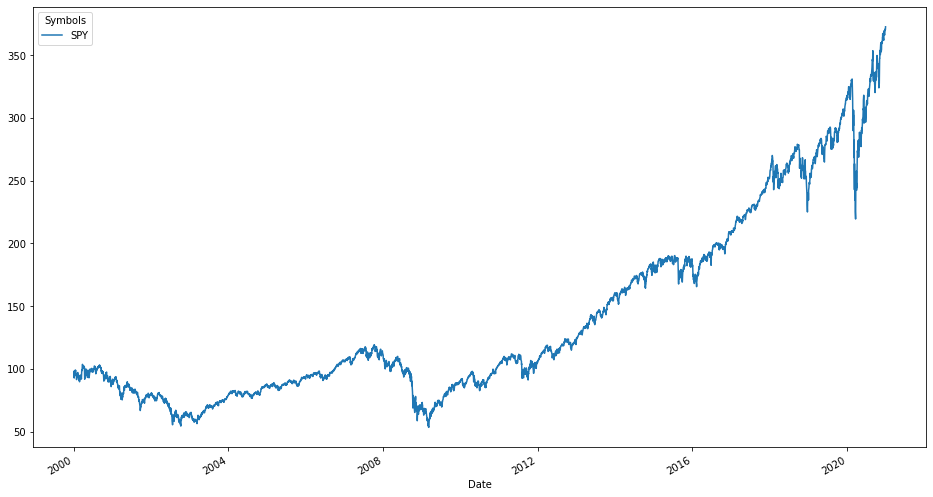

In [7]:
tickers = ['SPY']

start_date = '2000-01-01'
end_date = '2020-12-31'

data.DataReader(
    tickers,
    start=start_date, 
    end=end_date, 
    data_source='yahoo',
)["Adj Close"].plot(figsize=(16,9))

# Qué acciones componen actualmente al S&P500?

Es posible conseguir la lista de constituyentes del S&P500 desde Wikipedia: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies. Pero también podemos obtener esta tabla directamente con Pandas!

In [6]:
# Podemos usar la función 'read_html' de Pandas, a la cual le mandamos nuestra URL y nos devuelve una lista de DataFrames que Pandas pudo rescatar desde la página.
# Vamos a usarla para obtener nuestra lista de constituyentes.
snp = pd.read_html("COLOCAR URL Y BUSCAR EN LISTA")

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


## Sectores
Como se puede observar en la tabla, cada compañía que cotiza públicamente en la bolsa puede ser asignada a un sector e incluso a un subsector (GICS Sector, GICS Sub-Industry).

### Ejercicios
- Cuántos distintos sectores existen actualmente entre las empresas del S&P500? Cuántas acciones por sector hay?

- Elijamos 3 sectores existentes y para cada uno de ellos, construyamos un índice con las compañías del S&P500 que pertenezcan a él y que el valor del mismo sea la suma de una acción de cada empresa del sector en el cierre ajustado (Adj Close).

- Graficar todos estos índices en un mismo lugar, junto al S&P500, para todo lo que va del 2021. Es posible que haya que normalizarlos para poder comparar mejor su rendimiento, cómo podemos hacerlo? Podemos calcular su Sharpe Ratio?

In [ ]:
# Crear índices y graficar/comparar.

## Cisnes Negros

Un Cisne Negro (Black Swan) es un evento impredecible que trae consecuencias potencialmente muy severas. Estos eventos tienen como características principales su extrema rareza, impacto severo y la idea de que, mirando al pasado, era obvio que iban a ocurrir.

Un ejemplo famoso de cisne negro en el mercado estadounidense fue la "Burbuja de las DotCom": Una rápida subida de valor en las acciones de las empresas de base tecnológica hizo que el índice Nasdaq subiera su valor de 1000 a más de 5000 en un período de 5 años (1995-2000). En 2001, el índice tardó aproximadamente 7 meses en bajar un 76%, volviendo a una valoración de 1136, con pérdidas del 80% del valor en casos como los de Cisco, Intel y Oracle. El índice tardó luego 15 años en volver al valor de finales del 2000. Para más información, se puede visitar el [siguiente link](https://www.investopedia.com/terms/d/dotcom-bubble.asp).

Para identificar cisnes negros en el mercado financiero, podemos usar los retornos diarios de las acciones y ajustar una distribución de probabilidad normal sobre los mismos. Aquellos retornos que estén por encima o por debajo de 3 o más desviaciones estándar pueden ser considerados cisnes negros.

### Ejercicios
- Cuántos de estos eventos existieron en el S&P500 desde el año 2000 hasta la fecha y cuándo ocurrieron esos eventos? Es posible encontrar algunas noticias relacionadas con esas fechas?

- Supongamos que invertimos U$D 1.000 en el SPY a comienzos del 2000 y que además teníamos una bola de cristal, pudiendo dejar de invertir nuestro dinero justo el día anterior a un cisne negro y reinvertirlo el día después. Cuánto dinero tendríamos hoy?


## Cómo se generan los precios diarios?

Si bien los precios con los que estamos trabajando ahora no parecen ser un volumen muy grande de datos, los mismos son resúmenes generados a partir de datos de transacciones de mercado en tiempo real todos los días, para todos los activos financieros. FINRA cuenta un poco cómo es el proceso del punto de vista del gran volumen manejado en [este link](https://technology.finra.org/articles/how-finra-processes-75-billion-market-events-daily.html).

Por lo general, los mercados de acciones permanecen abiertos durante los días hábiles desde aprox. las 11hs hasta las 17hs y durante todo ese período, para todo activo, se realizan ofertas de compra y venta de los mismos, que se van organizando automáticamente en un libro de órdenes como el de la imagen de abajo.

![order_book](https://wp.fxssi.com/wp-content/uploads/2019/04/en_post-images.jpg)

Básicamente, para cada activo, se listan todas las ofertas de compra y venta y se realiza una operación exitosamente cuando coinciden los precios.

## Timeframes

Cómo vimos en el primer práctico y en sus correcciones, es muy importante establer un marco temporal de análisis que sea consistente con la estrategia de inversión.

Para algotrading un timeframe apropiado será el análisis de milisegundos, y para una estrategia de largo plazo el análisis puede ser mensual. 

### Ejercicios

1) Transformar los índices realizados en el ejercicio anterior a timeframes mensuales. 

2) Para ello en cada fila de datos considerar el Open, Close, High y Low de cada mes. 

3) Graficar los cierres ajustados de estas nuevas series contrastandolas contra las series diarias. 

4) Comentar: ¿Qué información se gana y se pierde con este cambio? ¿Cuándo se imaginan que puede ser útil tomar esta perspectiva?